### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Multiple Linear Regression

A statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response(dependent) variable.

Here our model is:   

$$Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p$$   
   
In this case, $Y$ is the response variable which depends on the $p$ predictor variables.

$\beta_0$ is the intercept. This can be interpreted as the value of $Y$ when all predictor variables are equal to zero.

$\beta_j$ is the average effect on $Y$ of a one-unit increase in $X_j$.

### Assignment
Build a model to predict employee salaries from different employee characteristics (or features)


# Steps and questions



   Steps and questions
   
1. Perform some exploratory data analys (EDA) is by creating appropariate plots (e.g scatterplots and histograms) to visualise and investigate relatioships between dependent variables and the target/independent variable (salary).
Create a descriptive statistics table to further characterise and describe the population under investigation.
Which variables seem like good predictors of salary?
Do any of the variables need to be transformed to be able to use them in a linear regression model?


2. Perform some basic features engineering by one-hot encoding the variable Field into three dummy variables, using HR as the reference category
You can use pandas’ get_dummies() function for this (refer to “Background materials 1-3”).


3. Perform correlation and statistical significance analysis to validate the relationship salary to each of the potential predictor variables:
Calculate Pearson correlation coeffificent and plot the correspnding correlation matrix
Calculate p-values related to the Pearson correlation coeffificents
Address any problems that may adversely affect the multiple regression (e.g multicollinearity)


4. Conduct some basic feature selection tasks by aggreating results from EDA, correlation matrix and p-values. Justify your feature selection decisions.


5. Split your data into a training and test set.


6. Train model:
Fit a multiple linear regression model using a training dataset with corresponding features selected above
Use the multiple linear regression model created from independent variables selected above and the training dataset to predict salary using the training dataset.
Interpret the standardised coefficients given in the statsmodels output.
What are the most important features when predicting employee salary?


7. Test model:
Run your model on the test set.


8. Evaluate model
Calculate and eplxain the significance of the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Square Error (RMSE) and R-squared values for your model
Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).
Plot the residuals versus the predicted values using seaborn’s residplot with predicted values as the x parameter, and the actual values as y, specify lowess=True.
Are there any problems with the regression?


9. Benchmark with cross-validation model
Perform cross-validation using the training dataset, test and evaluate the cross-validation model with test data
Compare performance of the cross-validation model (less prone to over-fitting) to determine whether the developed model has overfitted or not
Does it seem like you have a reasonably good model?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.preprocessing import StandardScaler

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

/home/puleng/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# In this project, employee salaries have been identified as the dependant variable. We will first start by cleaning so that the data is relevant for plotting before we can start addressing the above steps in no specific order.

We will first get the data and read it, also see how the data looks.

In [2]:
salary = pd.read_csv('salary.csv')
# salary = salary.dropna()
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
0,53000.0,0,0,0,1.17,1,0,1,1,3,0
1,58000.0,1,0,0,1.24,1,0,1,1,2,0
2,45500.0,0,0,0,1.21,1,0,1,1,3,2
3,35782.0,0,2,1,0.99,1,0,1,1,4,1
4,34731.0,0,2,2,0.91,1,0,1,1,4,1


We need to check for any null values and decide how they can be populated.

In [3]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       513 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


As we can see from above, the salary column has one value missing and we will populate the missing value by the mean.

In [4]:
salary.describe()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
count,513.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,2.926070,12.852140,7.052529,0.948521,0.964981,0.044747,2.132296,0.750973,2.529183,6.982490
std,12685.132358,4.791397,9.444695,6.414771,0.149380,0.184008,0.206950,0.820075,0.432871,1.127420,16.873156
min,29000.000000,0.000000,0.000000,0.000000,0.710000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40000.000000,0.000000,4.000000,2.000000,0.840000,1.000000,0.000000,1.000000,1.000000,2.000000,0.000000
50%,50096.000000,0.500000,12.000000,5.000000,0.920000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000
75%,60345.000000,4.000000,22.000000,12.000000,1.020000,1.000000,0.000000,3.000000,1.000000,4.000000,2.000000
max,96156.000000,25.000000,41.000000,28.000000,1.330000,1.000000,1.000000,3.000000,1.000000,4.000000,118.000000


In [5]:
salary=salary.fillna(salary.mean())
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   salary       514 non-null    float64
 1   exprior      514 non-null    int64  
 2   yearsworked  514 non-null    int64  
 3   yearsrank    514 non-null    int64  
 4   market       514 non-null    float64
 5   degree       514 non-null    int64  
 6   otherqual    514 non-null    int64  
 7   position     514 non-null    int64  
 8   male         514 non-null    int64  
 9   Field        514 non-null    int64  
 10  yearsabs     514 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 44.3 KB


As we can see that there are no null values because the we populated the Nan  with the mean.

###  Perform some exploratory data analys (EDA) is by creating appropariate plots (e.g scatterplots and histograms) to visualise and investigate relatioships between dependent variables and the target/independent variable (salary). Create a descriptive statistics table to further characterise and describe the population under investigation. Which variables seem like good predictors of salary? Do any of the variables need to be transformed to be able to use them in a linear regression model?

We are going to calculate the correlation where the relationship between salary and the other variables is above 0.45.

In [6]:
# getting feature correlation
correlation = salary.corr()[abs(salary.corr()["salary"]) > 0.45].sort_values(by=["salary"], ascending=False)

Text(0.5, 1.0, 'correlation where the relationship between salary and the other variables above 0.45')

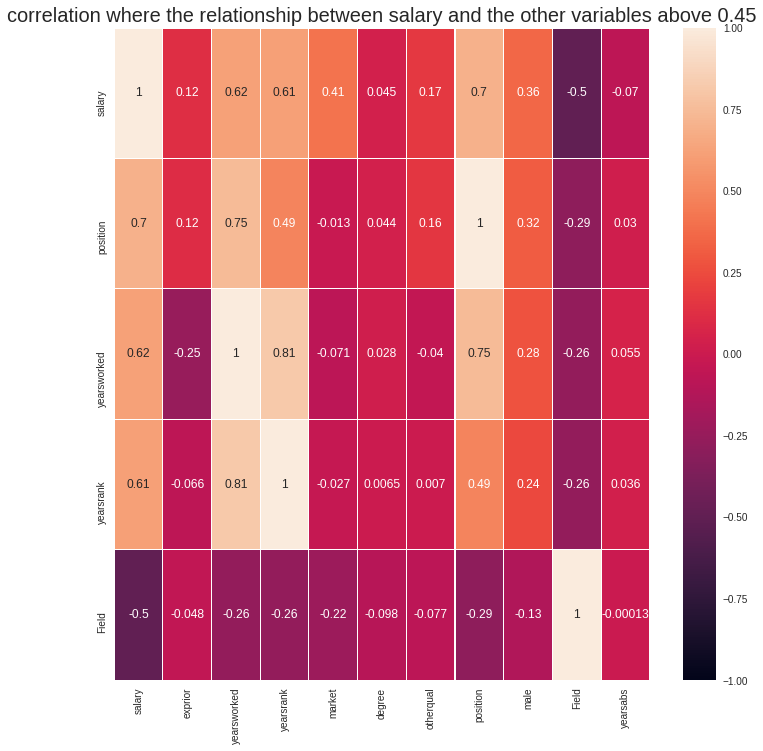

In [7]:
# correlation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, linewidth=0.1)
plt.title('correlation where the relationship between salary and the other variables above 0.45',fontsize = 20)
# sns.heatmap(salary, annot=True, annot_kws={"size": 7})

From the above graph we can clearly see that yearsranked, yearsworked and position have the highest positive relationship with salary.This implies that they are good predictors of salary.

Text(0.5, 1.0, 'Plots for variables with highest positive relationship with salary')

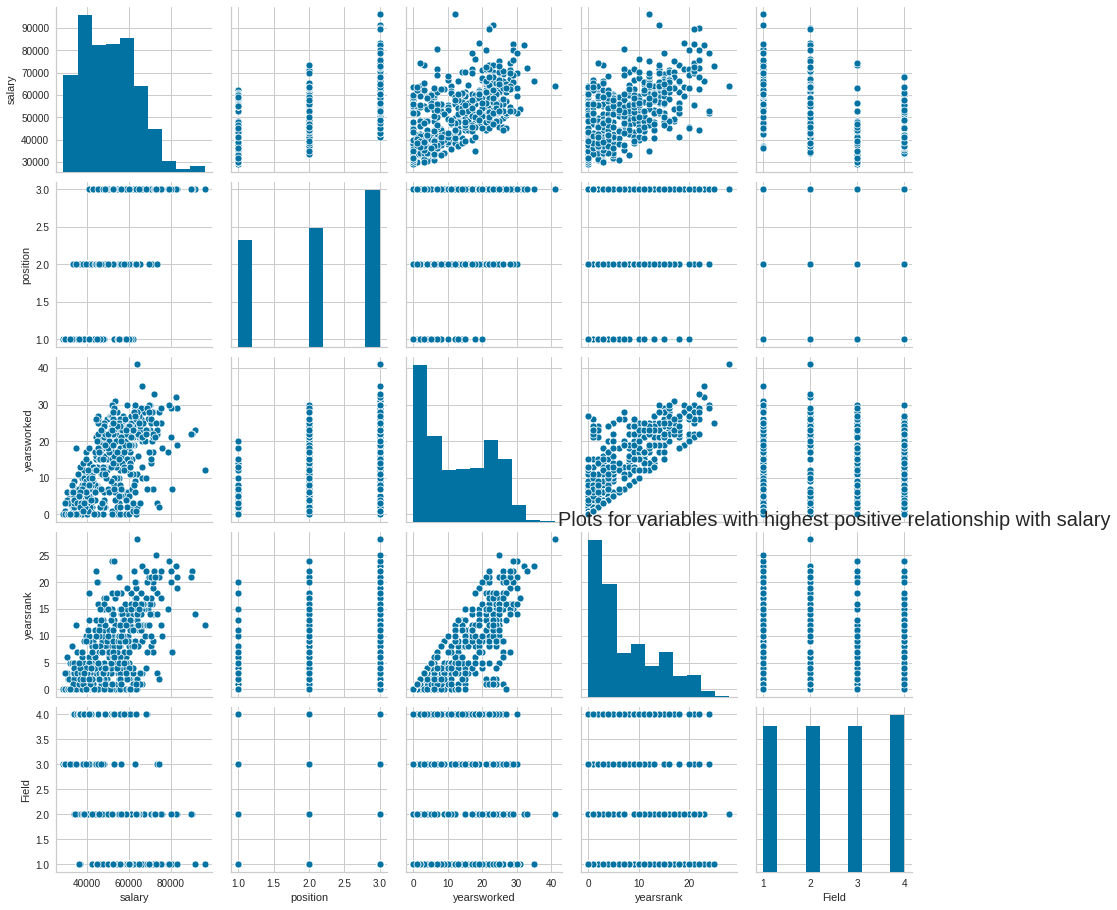

In [8]:
#Scatter and histogram
sns.pairplot(salary[['salary', 'position','yearsworked','yearsrank','Field']])
plt.title('Plots for variables with highest positive relationship with salary', fontsize=20)

 We notice that the above pairplot shows a positive relationship between salary and yearsworked and yearsranked.

In [9]:
#Describing the numerical features.
salary[['salary','yearsworked','yearsrank','market','exprior','yearsabs']].describe()

,salary,yearsworked,yearsrank,market,exprior,yearsabs
count,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000
mean,50863.220098,12.852140,7.052529,0.948521,2.926070,6.982490
std,12672.762650,9.444695,6.414771,0.149380,4.791397,16.873156
min,29000.000000,0.000000,0.000000,0.710000,0.000000,0.000000
25%,40000.000000,4.000000,2.000000,0.840000,0.000000,0.000000
50%,50165.500000,12.000000,5.000000,0.920000,0.500000,1.000000
75%,60306.250000,22.000000,12.000000,1.020000,4.000000,2.000000
max,96156.000000,41.000000,28.000000,1.330000,25.000000,118.000000


### Hypothesis Testing

Null Hypothesis: There is no relationship that exists between salary and all the features in the dataset.


Alternate Hypothesis: There exists a linear relationship between salary and some of the features in the dataset.

We are testing to validate if there is a relationship that exists between salary and years worked, with a significance level of 5%.

- Having observed the above charts, for Years Worked and Years Rank we reject the null hypothesis reason being that there is a linear relationship between these variables. There we are selecting these variables as our predictors for the target salary.


- +0.50. A moderate uphill (positive) relationship+0.70. A strong uphill (positive) linear relationship.

### One-hot encode the variable Field into three dummy variables, using HR as the reference category. You can use pandas’ get_dummies() function for this.

In [10]:
field = pd.get_dummies(salary['Field'])
field.drop(1, inplace=True, axis=1)

new_field = field.rename(columns={2:'Finance',3:'HR',4:'Marketing'})

salary= pd.concat([salary, new_field] ,axis=1, ignore_index=False)
salary.drop("Field", inplace=True, axis=1)
salary.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Finance,HR,Marketing
0,53000.0,0,0,0,1.17,1,0,1,1,0,0,1,0
1,58000.0,1,0,0,1.24,1,0,1,1,0,1,0,0
2,45500.0,0,0,0,1.21,1,0,1,1,2,0,1,0
3,35782.0,0,2,1,0.99,1,0,1,1,1,0,0,1
4,34731.0,0,2,2,0.91,1,0,1,1,1,0,0,1


### Conduct some basic feature selection tasks by aggreating results from EDA, correlation matrix and p-values. Justify your feature selection decisions.

#### Feature Transformation

In [11]:
total_variance = []
for i in salary.columns:
    total_variance.append(salary[i].var())

print("Overall variance: {}".format(sum(total_variance) / len(total_variance)))

Overall variance: 12353796.363372644


Due to the high total variance, features will be transformed to reduce the overall variance.

In [12]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(salary)

scaled_data = pd.DataFrame(scaled_data, columns=salary.columns)

scaled_data.head()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,yearsabs,Finance,HR,Marketing
0,0.168776,-0.611287,-1.362104,-1.100491,1.484097,0.1905,-0.216433,-1.382068,0.575853,-0.414226,-0.569862,1.754812,-0.599824
1,0.563708,-0.402377,-1.362104,-1.100491,1.953157,0.1905,-0.216433,-1.382068,0.575853,-0.414226,1.754812,-0.569862,-0.599824
2,-0.423621,-0.611287,-1.362104,-1.100491,1.752131,0.1905,-0.216433,-1.382068,0.575853,-0.295579,-0.569862,1.754812,-0.599824
3,-1.191209,-0.611287,-1.150139,-0.944449,0.277942,0.1905,-0.216433,-1.382068,0.575853,-0.354902,-0.569862,-0.569862,1.667157
4,-1.274224,-0.611287,-1.150139,-0.788407,-0.258126,0.1905,-0.216433,-1.382068,0.575853,-0.354902,-0.569862,-0.569862,1.667157


In [13]:
scaled_variance = []
for i in scaled_data.columns:
    total_variance.append(scaled_data[i].var())

print("Overall variance: {}".format(sum(scaled_variance)))

Overall variance: 0


### Split your data into a training and test set.

In [14]:
from statsmodels.formula.api import ols

X_train, X_test, y_train, y_test = train_test_split(
   scaled_data.drop(labels=["salary"], axis=1),
    scaled_data["salary"],
    test_size = 0.3,
    random_state = 42
)

X_train.shape, X_test.shape

((359, 12), (155, 12))

### Perform correlation and statistical significance analysis to validate the relationship salary to each of the potential predictor variables: Calculate Pearson correlation coeffificent and plot the correspnding correlation matrix Calculate p-values related to the Pearson correlation coeffificents Address any problems that may adversely affect the multiple regression (e.g multicollinearity)

In [15]:
X = sm.add_constant(X_train[['yearsworked', 'yearsrank']])
model = sm.OLS(y_train, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     136.4
Date:                Thu, 07 May 2020   Prob (F-statistic):           1.05e-44
Time:                        21:11:19   Log-Likelihood:                -401.13
No. Observations:                 359   AIC:                             808.3
Df Residuals:                     356   BIC:                             819.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0020      0.039     -0.051      0.959      -0.079       0.075
yearsworked     0.4049      0.065      6.253      0.000       0.278       0.532
yearsrank       0.2768      0.064      4.310      0.000       0.150       0.403
==============================================================================
Omnibus:                       36.392   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.599
Skew:                           0.807   Prob(JB):                     2.07e-10
Kurtosis:                       3.613   Cond. No.                         2.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

5. Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()).

### Evaluate model Calculate and eplxain the significance of the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Square Error (RMSE) and R-squared values for your model Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()). Plot the residuals versus the predicted values using seaborn’s residplot with predicted values as the x parameter, and the actual values as y, specify lowess=True. Are there any problems with the regression?Evaluate model Calculate and eplxain the significance of the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Square Error (RMSE) and R-squared values for your model Calculate the standardised residuals (resid()) and standardised predicted values (fittedvalues()). Plot the residuals versus the predicted values using seaborn’s residplot with predicted values as the x parameter, and the actual values as y, specify lowess=True. Are there any problems with the regression?

In [29]:
# Calculations for Standard Residuals.
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance
standardized_residuals = influence.resid_studentized_internal
studentized_residuals = influence.resid_studentized_external
studentized_residuals = pd.DataFrame(studentized_residuals)

AttributeError: 'LinearRegression' object has no attribute 'get_influence'

In [17]:
# Calculations for Fitted Values.
fitted = model.fittedvalues
fitted = pd.DataFrame(fitted)

6. Plot the residuals versus the predicted values using seaborn’s residplot with fitted values as the x parameter, and the dependent variable as y, specify lowess=True. Are there any problems with the regression?


Text(0.5, 0, 'Residuals')

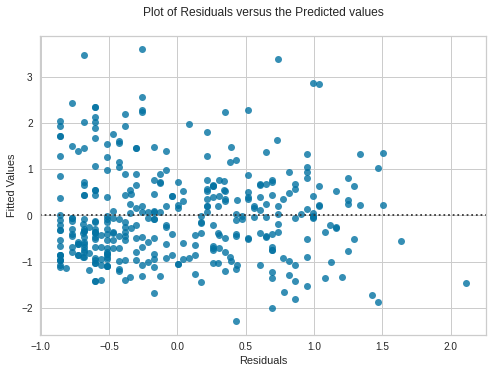

In [18]:
sns.residplot(fitted,studentized_residuals)
plt.title('Plot of Residuals versus the Predicted values\n')
plt.ylabel('Fitted Values')
plt.xlabel('Residuals')

7. Now run your model on the test set. How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any indication that the model has been overfit or does it seem like a reasonably good model?

In [26]:
x_test = sm.add_constant(X_test[['yearsworked','yearsrank']])

y_prediction = model.predict(x_test)

### Train model: Fit a multiple linear regression model using a training dataset with corresponding features selected above Use the multiple linear regression model created from independent variables selected above and the training dataset to predict salary using the training dataset. Interpret the standardised coefficients given in the statsmodels output. What are the most important features when predicting employee salary?

In [20]:
# Train

pred = model.predict(X)

from statsmodels.tools.eval_measures import rmse
training_rmse = rmse(y_train, pred)
training_rmse

0.7396367867820395

### Test model: Run your model on the test set.

In [21]:
# Test
from statsmodels.tools.eval_measures import rmse
testing_rmse = rmse(y_test, y_prediction)
testing_rmse

0.8106810019791638

In [22]:
# diff
training_rmse - testing_rmse

-0.07104421519712434

The testing set performed better than the training set, this does not necessarily
mean the model overfitted the training set. One reason we believe the testing set 
performed so well is the fact that the testing set is relatively smaller than the training
set and or the test set could be fundamentally easier to predict (have less noise, less variance be less influenced by something not captured by the model.

### Conclusion

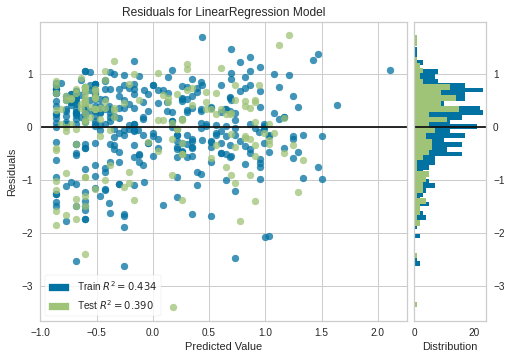

In [23]:
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot


# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show()                 # Finalize and render the figure

When we fit he training data to the visualizer, this evaluates the model and from the figure above,Rsquared for the train data is slightly higher than the test data which goes to show that the train data has the better fit. Remember the perfect fir with no variance will be where Rsquared equals to 1, so whichever of the two that is closer to one is what's preferable.